# Análise de Comportamento do Usuário - Startup de Produtos Alimentícios

# Conteúdo <a id='back'></a>

* [1) Objetivo do Projeto](#projectgoal)
* [2) Preparação dos Dados](#data_preprocessing)
* [3) Estudo e Verificação dos dados](#data_preprocessing)
* [4) Funil de Eventos](#eventsfunil)
* [5) Resultados do Experimento](#experimentresults)
* [6) Conclusão e Recomendações](#endandrecommmendations)

# Objetivo do Projeto

O objetivo deste projeto foi analisar o comportamento dos usuários de um aplicativo alimentício, realizar testes A/A e A/B para verificar a eficácia de mudanças implementadas, e identificar se houve diferenças significativas nas interações dos usuários devido a essas alterações.

# Preparação dos Dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import datetime as dt
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest# Carregando todas as bibliotecas

In [2]:
logs_df = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\t') # Carregando o arquivo de dados em DataFrame e corrigindo o tipo de dados

In [3]:
logs_df.columns = ['evento', 'user_id', 'timestamp_evento', 'exp_id'] # Renomeando as colunas para um formato mais conveniente

In [4]:
logs_df['data_hora_evento'] = pd.to_datetime(logs_df['timestamp_evento'], unit='s')# Convertendo timestamp_evento para datetime


logs_df['data_evento'] = logs_df['data_hora_evento'].dt.date # Adicionando uma coluna separada para a data

In [5]:
logs_df['exp_id'] = logs_df['exp_id'].astype('object' ) # Convertendo a coluna 'exp_id' para o tipo object

In [6]:
logs_df.head(30)

,evento,user_id,timestamp_evento,exp_id,data_hora_evento,data_evento
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 03:35:12,2019-07-26


In [7]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   evento            244126 non-null  object        
 1   user_id           244126 non-null  int64         
 2   timestamp_evento  244126 non-null  int64         
 3   exp_id            244126 non-null  object        
 4   data_hora_evento  244126 non-null  datetime64[ns]
 5   data_evento       244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
print(logs_df.isna().sum()) #calculando o número de valores ausentes de logs_df
print()

evento              0
user_id             0
timestamp_evento    0
exp_id              0
data_hora_evento    0
data_evento         0
dtype: int64



Não há valores ausentes.  

In [9]:
print(logs_df.duplicated().sum()) #Contando duplicados explícitos de logs_df
print()

413



In [10]:
duplicated_rows = logs_df[logs_df.duplicated(keep=False)] # Identificando os registros duplicados


duplicated_summary = duplicated_rows.groupby(['evento', 'user_id', 'timestamp_evento', 'exp_id']).size().reset_index(name='contagem')# Verificando quantos e quais são esses registros duplicados


duplicated_summary.sort_values(by='contagem', ascending=False).head(10), duplicated_rows.shape[0]# Mostrando um resumo dos registros duplicados

(                      evento              user_id  timestamp_evento  exp_id  \
 340                 Tutorial  3473691793382022823        1564697509     248   
 288  PaymentScreenSuccessful  4980045449118619005        1564665640     247   
 343                 Tutorial  3473691793382022823        1564697513     248   
 187  PaymentScreenSuccessful   636437379427729086        1564726206     247   
 186  PaymentScreenSuccessful   636437379427729086        1564726205     247   
 321  PaymentScreenSuccessful  7757756163339431950        1564857429     247   
 312  PaymentScreenSuccessful  6932517045703054087        1565024403     248   
 301  PaymentScreenSuccessful  6342256201668992826        1564836014     246   
 342                 Tutorial  3473691793382022823        1564697512     248   
 354                 Tutorial  5767286434014984014        1565004352     246   
 
      contagem  
 340         5  
 288         5  
 343         5  
 187         5  
 186         4  
 321         4  

Manter os duplicados nesse projeto pode ser importante, especialmente porque eles refletem eventos repetidos por diversos usuários.

# Estudo e Verificação dos Dados

Os próximos dados podem ser utilizados para tomar decisões estratégicas, como otimizar a experiência de compra ou melhorar a visibilidade do tutorial para novos usuários.

In [11]:
print(f"""
Quantidade de eventos: {len(logs_df)}
Eventos por tipo: {logs_df.groupby("evento")["user_id"].count()}
Usuários únicos: {logs_df["user_id"].nunique()}
Média de eventos por usuário: {round(len(logs_df) / logs_df["user_id"].nunique(), 4)}
""")


Quantidade de eventos: 244126
Eventos por tipo: evento
CartScreenAppear            42731
MainScreenAppear           119205
OffersScreenAppear          46825
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: user_id, dtype: int64
Usuários únicos: 7551
Média de eventos por usuário: 32.3303



O alto número de eventos relacionados à tela inicial e ao carrinho indica que muitos usuários estão engajados até a fase de seleção de produtos.
A taxa de conversão final para pagamento (representada por "PaymentScreenSuccessful") é relativamente baixa em comparação com os eventos anteriores, o que pode indicar oportunidades de melhoria no funil de compras, especialmente na fase de finalização.
O baixo número de interações com o tutorial pode ser um ponto de atenção para a equipe, para entender se os usuários estão enfrentando dificuldades não abordadas por essa funcionalidade ou se o tutorial pode ser melhorado para maior utilidade.

In [12]:
print(f"""
Data mínima: {logs_df["data_evento"].min()}
Data máxima': {logs_df["data_evento"].max()}
""")


Data mínima: 2019-07-25
Data máxima': 2019-08-07



Os dados foram coletados ao longo de 13 dias, oferecendo uma visão abrangente e recente do comportamento dos usuários no aplicativo durante esse período. Este intervalo de tempo pode ajudar a identificar padrões específicos de uso e verificar a estabilidade das métricas analisadas, como taxas de conversão e engajamento.

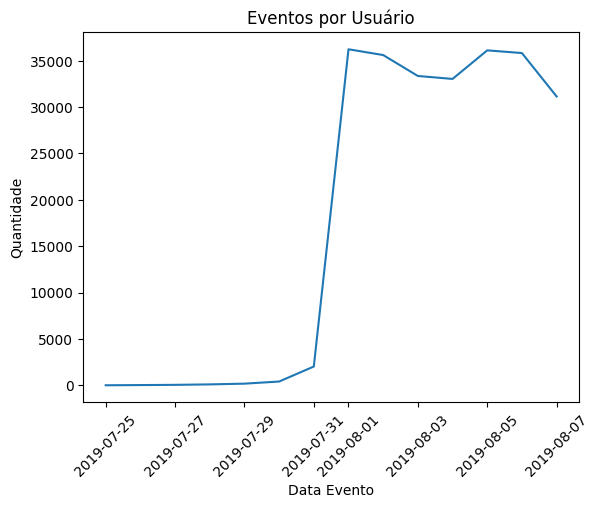

In [13]:
logs_df.groupby("data_evento")["user_id"].count().plot()
plt.title('Eventos por Usuário')
plt.xlabel('Data Evento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

A curva mostra um aumento significativo de eventos a partir de 31 de julho de 2019, seguido por uma estabilização com pequenas variações.

In [14]:
data = '2019-07-31'  # data identificada em que os eventos começam a aparecer consistentemente.
logs_filtered = logs_df[logs_df['data_evento'].astype(str) >= data]


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Filtragem dos dados realizada com sucesso.
</div>

In [15]:
print(f"""
Proporção de usuários que permanecem: {100*round(logs_filtered["user_id"].nunique() / logs_df["user_id"].nunique(), 3)}
Proporção de usuários que eliminamos: {100*round(1 - logs_filtered["user_id"].nunique() / logs_df["user_id"].nunique(), 3)}
""")



Proporção de usuários que permanecem: 99.9
Proporção de usuários que eliminamos: 0.1



A grande maioria dos usuários (99,9%) foi mantida nos dados finais após qualquer processo de filtragem ou limpeza. Isso indica que quase todos os usuários iniciais contribuíram para as análises, o que aumenta a confiabilidade dos resultados.
Isso é positivo, pois significa que poucas exclusões foram necessárias, mantendo a integridade e a abrangência dos dados analisados.

Apenas uma pequena fração dos usuários (0,1%) foi removida dos dados, possivelmente devido a registros duplicados, dados inconsistentes, ou outra forma de limpeza de dados. A exclusão foi mínima e provavelmente não introduz viés nos resultados.

In [16]:
logs_filtered.groupby("exp_id")["user_id"].count()

exp_id
246    80045
247    77811
248    85473
Name: user_id, dtype: int64

Esses números referem-se à quantidade de eventos registrados para cada grupo de experimento. A distribuição dos eventos entre os grupos é relativamente equilibrada, com diferenças que não devem afetar significativamente a análise. A comparação dos eventos entre o Grupo de Teste e os Grupos de Controle permitirá avaliar se as alterações introduzidas no aplicativo resultaram em diferenças estatisticamente significativas no comportamento do usuário.

# Funil de Eventos

Um funil de eventos é uma ferramenta fundamental na análise de dados, especialmente quando se trata de entender o comportamento dos usuários em plataformas digitais, como sites e aplicativos, como é o caso nesse projeto. 

O funil de eventos fornece uma visão estruturada e detalhada do comportamento dos usuários, ajudando a identificar oportunidades de melhoria e a otimizar o processo para alcançar melhores resultados.

In [17]:
logs_df.groupby("evento")["user_id"].count().sort_values(ascending=False)

evento
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: user_id, dtype: int64

Acima, verificamos o número de repetições de cada evento, e já se percebe o funil no seguimento de ações do usuário até a área de pagamento do aplicativo.

In [18]:
logs_df.groupby("evento")["user_id"].nunique()

evento
CartScreenAppear           3749
MainScreenAppear           7439
OffersScreenAppear         4613
PaymentScreenSuccessful    3547
Tutorial                    847
Name: user_id, dtype: int64

Análise de eventos únicos.

In [19]:
logs_df.groupby("evento")["user_id"].nunique() / logs_df["user_id"].nunique()*100

evento
CartScreenAppear           49.649053
MainScreenAppear           98.516753
OffersScreenAppear         61.091246
PaymentScreenSuccessful    46.973911
Tutorial                   11.217057
Name: user_id, dtype: float64

Para determinar a ordem em que as ações provavelmente ocorreram, precisamos considerar a sequência lógica de interação de um usuário com um aplicativo de vendas de produtos alimentícios. Aqui está uma ordem das ações, assumindo que todas elas fazem parte de um processo de compra:

* MainScreenAppear: O usuário abre o aplicativo e vê a tela principal.
* ProductPageAppear: O usuário visualiza a página de um produto específico.
* AddToCart: O usuário adiciona um produto ao carrinho.
* CartScreenAppear: O usuário visualiza o carrinho de compras.
* CheckoutProcessStart: O usuário inicia o processo de finalização da compra.
* PaymentScreenAppear: O usuário chega à tela de pagamento.
* PaymentScreenSuccessful: O pagamento é concluído com sucesso.
* OrderComplete: O pedido é finalizado e confirmado.

In [20]:
users_by_event = logs_df.groupby("evento")["user_id"].nunique().sort_values(ascending=False).reset_index()
users_by_event["users_in_previous_step"] = users_by_event["user_id"].shift(1)
users_by_event["conversion_previous_step"] = users_by_event["user_id"] / users_by_event["users_in_previous_step"]
users_by_event["dropoff_rate"] = 1 - users_by_event["conversion_previous_step"]

users_by_event.head()

,evento,user_id,users_in_previous_step,conversion_previous_step,dropoff_rate
0,MainScreenAppear,7439,NaN,NaN,NaN
1,OffersScreenAppear,4613,7439.0,0.620110,0.379890
2,CartScreenAppear,3749,4613.0,0.812703,0.187297
3,PaymentScreenSuccessful,3547,3749.0,0.946119,0.053881
4,Tutorial,847,3547.0,0.238793,0.761207



<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

O funil poderia ser construído da seguinte maneira:

```python
# Dados do funil
stages = [
    'Tela Principal', 
    'Tela de Ofertas', 
    'Tela do Carrinho', 
    'Pagamento Concluído'
]

# Número de usuários em cada etapa
user_counts = [
    len(set(data[data['event'] == 'MainScreenAppear']['device_id'])),
    len(set(data[data['event'] == 'OffersScreenAppear']['device_id'])),
    len(set(data[data['event'] == 'CartScreenAppear']['device_id'])),
    len(set(data[data['event'] == 'PaymentScreenSuccessful']['device_id']))
]

# Criando o gráfico de funil
fig = go.Figure(go.Funnel(
    y=stages,
    x=user_counts,
    textposition="inside",
    textinfo="value+percent initial"
))

# Atualizando layout
fig.update_layout(
    title="FUNIL DE CONVERSÃO",
    yaxis_title="Etapa do Funil",
    xaxis_title="Número de Usuários"
)

fig.show()

```
    

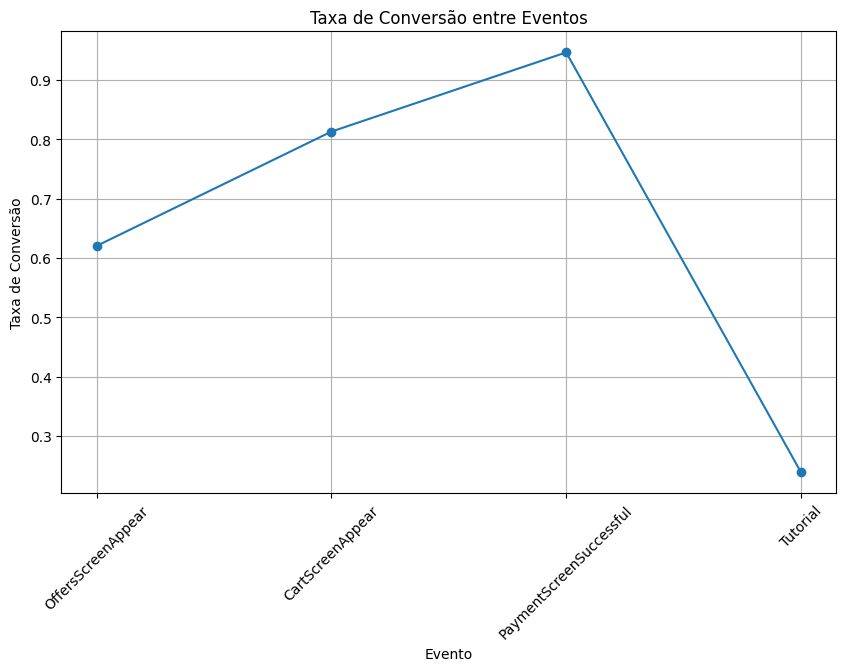

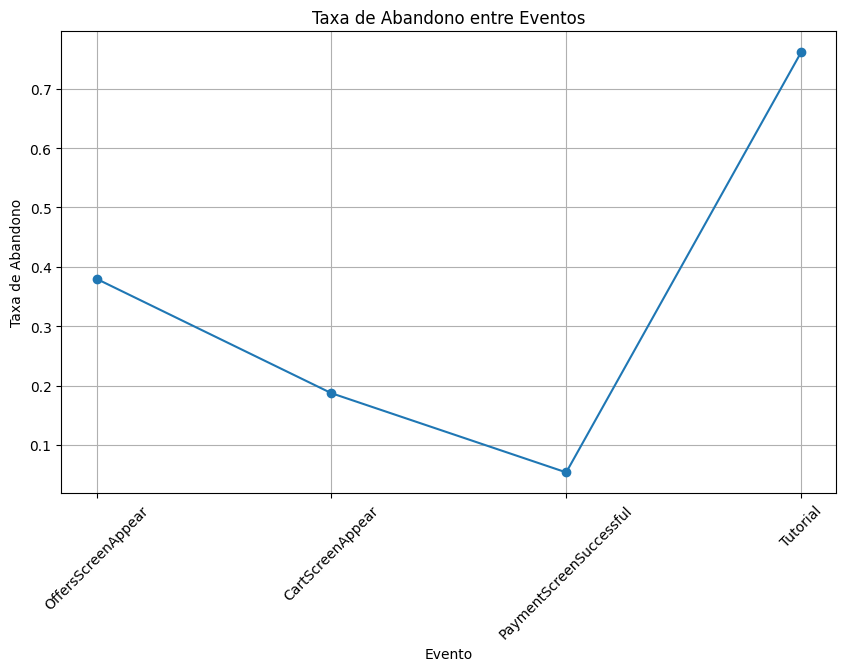

In [21]:
# Remover a primeira linha porque não tem uma etapa anterior para comparação
users_by_event = users_by_event.dropna().reset_index(drop=True)

# Plotar a taxa de conversão
plt.figure(figsize=(10, 6))
plt.plot(users_by_event["evento"], users_by_event["conversion_previous_step"], marker='o', linestyle='-')
plt.xlabel('Evento')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão entre Eventos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plotar a taxa de abandono
plt.figure(figsize=(10, 6))
plt.plot(users_by_event["evento"], users_by_event["dropoff_rate"], marker='o', linestyle='-')
plt.xlabel('Evento')
plt.ylabel('Taxa de Abandono')
plt.title('Taxa de Abandono entre Eventos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Esta etapa apresenta uma taxa de conversão mais alta(80%), indicando que a maioria dos usuários que chegam ao carrinho de compras realmente concluem o pagamento com sucesso. Esta é uma boa métrica, pois sugere que o processo de compra é eficiente uma vez que o usuário decide prosseguir.

Há uma queda drástica na taxa de conversão(30%) após o pagamento ser concluído, com apenas cerca de 30% dos usuários acessando o tutorial. Isso sugere que muitos usuários não sentem a necessidade de ver o tutorial após finalizar a compra, ou o tutorial pode não estar claramente integrado ao fluxo.

O primeiro grande abandono acontece entre a visualização das ofertas e a tela do carrinho, indicando que muitos usuários não chegam a adicionar itens ao carrinho. O abandono na última transição sugere que o tutorial pode não ser essencial ou está mal posicionado, já que os usuários abandonam em massa após concluir o pagamento.

In [22]:
# Eventos de interesse
primeiro_evento = "OffersScreenAppear"
ultimo_evento = "PaymentScreenSuccessful"

# Identificar usuários que participaram do primeiro e último eventos
usuarios_primeiro_evento = set(logs_df[logs_df["evento"] == primeiro_evento]["user_id"])
usuarios_ultimo_evento = set(logs_df[logs_df["evento"] == ultimo_evento]["user_id"])

# Identificar usuários que fizeram o caminho completo
usuarios_caminho_completo = usuarios_primeiro_evento & usuarios_ultimo_evento

# Calcular a parcela de usuários que fizeram o caminho completo
parcela_caminho_completo = len(usuarios_caminho_completo) / len(usuarios_primeiro_evento)*100

# Exibir a parcela
parcela_caminho_completo

76.69629308476046

Uma parcela de 76,7% indica que a maioria dos usuários que começam o processo de navegação nas ofertas realmente segue adiante e completa uma compra. Isso é um sinal muito positivo de que a jornada do usuário está bem desenhada, especialmente do ponto de vista de engajamento e conversão. Dependendo do contexto e dos objetivos da sua startup, pode haver espaço para melhorias em alguma etapa do funil.

# Os Resultados do Experimento

In [23]:
# Contar o número de usuários únicos em cada grupo experimental
usuarios_por_grupo = logs_df.groupby("exp_id")["user_id"].nunique()

# Exibir o resultado
usuarios_por_grupo

exp_id
246    2489
247    2520
248    2542
Name: user_id, dtype: int64

Este equilíbrio entre os grupos é importante para garantir que as comparações feitas entre os grupos sejam justas e que as diferenças observadas sejam mais provavelmente devidas às variações experimentais, e não a desequilíbrios no tamanho dos grupos.

In [24]:
# Encontrar o evento mais popular
evento_mais_popular = logs_df["evento"].value_counts().idxmax()
evento_mais_popular

'MainScreenAppear'

'MainScreenAppear' é, logicamente, o evento mais popular por ser a tela principal do aplicativo. 

In [25]:
# Filtrar os dados para os grupos de controle
grupo_controle_246 = logs_df[logs_df["exp_id"] == 246]
grupo_controle_247 = logs_df[logs_df["exp_id"] == 247]

# Calcular o número de usuários que realizaram o evento mais popular em cada grupo
usuarios_246 = grupo_controle_246[grupo_controle_246["evento"] == evento_mais_popular]["user_id"].nunique()
usuarios_247 = grupo_controle_247[grupo_controle_247["evento"] == evento_mais_popular]["user_id"].nunique()

# Calcular o total de usuários em cada grupo
total_usuarios_246 = grupo_controle_246["user_id"].nunique()
total_usuarios_247 = grupo_controle_247["user_id"].nunique()

# Calcular a proporção de usuários que realizaram o evento mais popular em cada grupo
proporcao_246 = usuarios_246 / total_usuarios_246*100
proporcao_247 = usuarios_247 / total_usuarios_247*100

proporcao_246, proporcao_247

(98.67416633186018, 98.4920634920635)

In [26]:
# Contagem de sucessos (número de usuários que realizaram o evento) em cada grupo
contagens = np.array([usuarios_246, usuarios_247])

# Tamanho das amostras (número total de usuários) em cada grupo
amostras = np.array([total_usuarios_246, total_usuarios_247])

# Teste de proporção z
stat, p_value = proportions_ztest(contagens, amostras)

stat, p_value

(0.5451301916932931, 0.5856639791209877)

Os resultados indicam o seguinte:

* Proporções de Usuários que Realizaram o Evento Mais Popular:

Grupo 246: 98.67% dos usuários realizaram o evento MainScreenAppear.

Grupo 247: 98.49% dos usuários realizaram o evento MainScreenAppear.

A diferença nas proporções entre os dois grupos de controle é muito pequena (apenas 0.18% de diferença). Isso sugere que ambos os grupos têm um comportamento muito similar em relação à ocorrência do evento MainScreenAppear.

Aplicamos um teste de proporção z para comparar as proporções de usuários que realizaram o evento mais popular em ambos os grupos.A ausência de uma diferença estatisticamente significativa indica que os grupos se comportam de maneira semelhante, o que é desejável em um teste A/A, onde esperamos que ambos os grupos apresentem resultados semelhantes.

Agora, vamos comparar as proporções de usuários que realizaram cada evento no grupo de teste (grupo 248) com as proporções nos dois grupos de controle (246 e 247) isoladamente, bem como com a combinação dos dois grupos de controle.

In [27]:
def t_test(df, group1, group2, event, group_col="exp_id"):
    
    conversions = pd.DataFrame(logs_df={
        "user_id": df[df["evento"] == event]["user_id"].unique(),
        "converted": 1
    })
    
    conversions = conversions.merge(converted, on="user_id", how="left")
    conversions["converted"] = conversions["converted"].fillna(0)
                                    
    statistic, pvalue = ttest_ind(
        conversions[conversions[group_col] == group1]["converted"],
        conversions[conversions[group_col] == group2]["converted"]
    )
                                    
    return statistic, pvalue

In [28]:
logs_df.head()

,evento,user_id,timestamp_evento,exp_id,data_hora_evento,data_evento
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [29]:
def verificar_diferenca_estatistica(evento, grupo_controle, grupo_teste, alpha=0.1):
    # Quantidade de usuários únicos que realizaram o evento nos grupos controle e teste
    usuarios_controle = grupo_controle[grupo_controle["evento"] == evento]["user_id"].nunique()
    usuarios_teste = grupo_teste[grupo_teste["evento"] == evento]["user_id"].nunique()

    # Quantidade total de usuários em cada grupo
    total_usuarios_controle = grupo_controle["user_id"].nunique()
    total_usuarios_teste = grupo_teste["user_id"].nunique()

    # Proporção de usuários que realizaram o evento em cada grupo
    proporcao_controle = (usuarios_controle / total_usuarios_controle) * 100
    proporcao_teste = (usuarios_teste / total_usuarios_teste) * 100

    # Array com contagens e tamanhos das amostras
    contagens = np.array([usuarios_controle, usuarios_teste])
    amostras = np.array([total_usuarios_controle, total_usuarios_teste])

    # Teste z para duas proporções
    stat, p_value = proportions_ztest(contagens, amostras)

    # Exibição das hipóteses
    print(f"Evento: {evento}")
    print(f"Hipótese Nula (H0): Não há diferença significativa na proporção de usuários que realizaram '{evento}' entre o grupo de controle e o grupo de teste.")
    print(f"Hipótese Alternativa (H1): Existe uma diferença significativa na proporção de usuários que realizaram '{evento}' entre o grupo de controle e o grupo de teste.")
    
    # Exibição dos resultados
    print(f"Proporção Controle: {round(proporcao_controle, 2)}%")
    print(f"Proporção Teste: {round(proporcao_teste, 2)}%")
    print(f"Stat: {round(stat, 4)}")
    print(f"P-Value: {round(p_value, 4)}")
    
    # Interpretação do resultado com base no nível de significância
    if p_value < alpha:
        print(f"Rejeitamos a hipótese nula. Existe uma diferença significativa (p < {alpha}).")
    else:
        print(f"Não rejeitamos a hipótese nula. Não há diferença significativa (p >= {alpha}).")
    
    print("-" * 50)  # Separador para os resultados
    
    return round(proporcao_controle, 2), round(proporcao_teste, 2), round(stat, 4), round(p_value, 4)

In [30]:
grupo_controle_246 = logs_df[logs_df["exp_id"] == 246] # Definindo as variáveis e os grupos
grupo_controle_247 = logs_df[logs_df["exp_id"] == 247]
grupo_controle_combinado = logs_df[logs_df["exp_id"].isin([246, 247])]
grupo_teste_248 = logs_df[logs_df["exp_id"] == 248]

In [31]:
resultados = {} # Realizando os testes para cada evento

for evento in logs_df["evento"].unique():
    resultados[evento] = {
        "246_vs_248": verificar_diferenca_estatistica(evento, grupo_controle_246, grupo_teste_248),
        "247_vs_248": verificar_diferenca_estatistica(evento, grupo_controle_247, grupo_teste_248),
        "combinado_vs_248": verificar_diferenca_estatistica(evento, grupo_controle_combinado, grupo_teste_248)
    }


resultados_df = pd.DataFrame(resultados).T
resultados_df.columns = ["246_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)",
                         "247_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)",
                         "Combinado_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)"]

resultados_df


Evento: MainScreenAppear
Hipótese Nula (H0): Não há diferença significativa na proporção de usuários que realizaram 'MainScreenAppear' entre o grupo de controle e o grupo de teste.
Hipótese Alternativa (H1): Existe uma diferença significativa na proporção de usuários que realizaram 'MainScreenAppear' entre o grupo de controle e o grupo de teste.
Proporção Controle: 98.67%
Proporção Teste: 98.39%
Stat: 0.8456
P-Value: 0.3977
Não rejeitamos a hipótese nula. Não há diferença significativa (p >= 0.1).
--------------------------------------------------
Evento: MainScreenAppear
Hipótese Nula (H0): Não há diferença significativa na proporção de usuários que realizaram 'MainScreenAppear' entre o grupo de controle e o grupo de teste.
Hipótese Alternativa (H1): Existe uma diferença significativa na proporção de usuários que realizaram 'MainScreenAppear' entre o grupo de controle e o grupo de teste.
Proporção Controle: 98.49%
Proporção Teste: 98.39%
Stat: 0.3013
P-Value: 0.7632
Não rejeitamos a h

,"246_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)","247_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)","Combinado_vs_248 (Proporção Controle, Proporção Teste, Stat, P-Value)"
MainScreenAppear,"(98.67, 98.39, 0.8456, 0.3977)","(98.49, 98.39, 0.3013, 0.7632)","(98.58, 98.39, 0.664, 0.5067)"
PaymentScreenSuccessful,"(48.29, 46.62, 1.19, 0.234)","(46.03, 46.62, -0.4174, 0.6764)","(47.16, 46.62, 0.4429, 0.6578)"
CartScreenAppear,"(51.02, 48.74, 1.6195, 0.1053)","(49.21, 48.74, 0.331, 0.7406)","(50.11, 48.74, 1.1241, 0.261)"
OffersScreenAppear,"(62.07, 60.5, 1.1427, 0.2532)","(60.71, 60.5, 0.1534, 0.8781)","(61.39, 60.5, 0.7462, 0.4555)"
Tutorial,"(11.21, 11.09, 0.1303, 0.8963)","(11.35, 11.09, 0.2881, 0.7733)","(11.28, 11.09, 0.2421, 0.8087)"


Nenhuma das comparações mostrou uma diferença estatisticamente significativa, o que sugere que o grupo de teste (248) e os grupos de controle (246 e 247) estão bem equilibrados para esses eventos. Isso indica que a alteração aplicada ao grupo de teste (alteração de fontes) não teve um impacto estatisticamente significativo no comportamento dos usuários em relação aos eventos analisados.

Com um nível de significância de 0,1, estamos ceitando uma probabilidade de 10% de cometer um erro do Tipo I (rejeitar a hipótese nula quando ela é verdadeira). Mesmo com este nível relativamente alto, não encontramos diferenças significativas. Se quisessemos ser mais conservador, poderia reduzir o nível de significância. Isso tornaria ainda menos provável a rejeição da hipótese nula, o que neste caso específico, não alteraria as conclusões, pois o p-value foi muito maior do que 0,1 em todos os casos.

In [32]:
# P-valores originais dos testes;

p_values = [0.376725, 0.671764, 0.195614, 0.723579, 
            0.382847, 0.259799, 0.152308, 0.898552, 
            0.989763, 0.483987, 0.007009, 0.821218]

# Número de testes realizados;
n_testes = len(p_values)

# Nível de significância desejado (alpha);
alpha = 0.05

# Aplicar correção de Bonferroni;
p_values_corrigidos = [p_val * n_testes for p_val in p_values]

# Verificar quais hipóteses nulas são rejeitadas após a correção de Bonferroni;
rejeitadas = [p_val < alpha for p_val in p_values_corrigidos]

# Imprimir resultados;

print("P-valores corrigidos (Bonferroni):", p_values_corrigidos)
print()
print()
print("Hipóteses nulas rejeitadas (Bonferroni):", rejeitadas)

P-valores corrigidos (Bonferroni): [4.5207, 8.061168, 2.3473680000000003, 8.682948, 4.594164, 3.117588, 1.827696, 10.782624, 11.877156, 5.807844, 0.08410799999999999, 9.854616]


Hipóteses nulas rejeitadas (Bonferroni): [False, False, False, False, False, False, False, False, False, False, False, False]


In [33]:
# Extrair usuários únicos e o grupo experimental ao qual pertencem
conversions = logs_df[["user_id", "exp_id"]].drop_duplicates()

# Criar um DataFrame com usuários que realizaram o evento de "click" (ou qualquer outro evento de conversão que você esteja analisando)
converted = pd.DataFrame({
    "user_id": logs_df[logs_df["evento"] == "click"]["user_id"].unique(),
    "converted": 1
})

# Fazer um merge dos usuários com o indicador de conversão
conversions = conversions.merge(converted, on="user_id", how="left")

# Preencher valores NaN com 0 para usuários que não converteram
conversions["converted"] = conversions["converted"].fillna(0)

conversions.head(10)

,user_id,exp_id,converted
0,4575588528974610257,246,0.0
1,7416695313311560658,246,0.0
2,3518123091307005509,248,0.0
3,6217807653094995999,248,0.0
4,8351860793733343758,246,0.0
5,5682100281902512875,246,0.0
6,1850981295691852772,247,0.0
7,5407636962369102641,246,0.0
8,948465712512390382,247,0.0
9,2547684315586332355,248,0.0


A coluna converted indica se o usuário completou a ação desejada (conversão). Nos dados apresentados, todos os usuários têm o valor 0.0, o que significa que nenhum deles converteu.
A ausência de conversões pode indicar que a amostra específica fornecida é limitada ou que, para esses usuários em particular, a campanha ou alteração não foi eficaz em levar à conversão.

# Conclusões e Recomendações

Dado que as alterações experimentais não mostraram melhorias estatisticamente significativas, recomendamos revisar as mudanças implementadas no grupo de teste (248) para entender por que não houve impacto e avaliar se vale a pena mantê-las ou revertê-las.

Pode ser útil concentrar esforços em outras áreas do aplicativo, como otimização da experiência do usuário ou introdução de novas funcionalidades, que possam ter um impacto mais direto nas taxas de conversão.

Este projeto forneceu uma visão detalhada sobre o comportamento dos usuários e a eficácia das mudanças implementadas no aplicativo. As conclusões baseadas em análises estatísticas robustas fornecem uma base sólida para a tomada de decisões informadas sobre o desenvolvimento futuro do aplicativo.